# Cartopy

首先可以关注[SciTools](https://github.com/SciTools)。

"SciTools is a collaborative effort to produce powerful Python-based open-source tools for Earth scientists"

cartopy 是该社区开发的一个matplotlib支持的绘图python库，是basemap在python3的延续，因此就像python绘图从matplotlib开始一样，python+gis绘图当从它开始。cartopy 官方文档在[这里](https://scitools.org.uk/cartopy/docs/latest/)，geopandas （更多内容可以参考[hydroGIS repo](https://github.com/OuyangWenyu/hydroGIS)的AutoGIS文件夹下的内容）和 cartopy 的联合使用可以参考：[Plotting with CartoPy and GeoPandas](https://geopandas.readthedocs.io/en/latest/gallery/cartopy_convert.html)。本文记录内容主要参考了[Maps with Cartopy](https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html)和[Basics: Quick + Simple maps with cartopy](https://geohackweek.github.io/visualization/03-cartopy/)。

## Cartopy 基本概念

Cartopy 使用了基本的matplotlib库来提供地理空间的绘图功能。 有一系列稳定的工具集来定义投影，再投影数据等。能提供了简单的精确制图的方法来构建地图，并且能和geopandas很好的协作。

Projections：Cartopy 的一个核心用途是定义转换数据投影的功能。cartopy.crs 模块定义了一系列投影，这在定义图形的投影时是很有用的。

Features：Cartopy 也包含了处理像shpfile和geojson的地理空间数据文件的模块，有一系列很方便使用的dataloader来向地图上增加内容，比如海岸线，边界等。

下面看一个例子。先回顾下在matplotlib中，绘制一个plot的过程。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
ax = plt.axes()           # create a set of axes
x = np.arange(5)
y = np.arange(5)
ax.scatter(x, y)   # plot some data on them
ax.set_title("Title")     # label it
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
plt.show()

<Figure size 640x480 with 1 Axes>

如上代码所示，首先定义坐标，然后是定义图形类型，最后设置图形细节。

空间数据比较特别，因为地图是有自己特定的坐标系的。因此，当我们使用cartopy 定义地图时，我们要指定坐标系，如下所示，在定义axes实例时，指定projection参数的值。

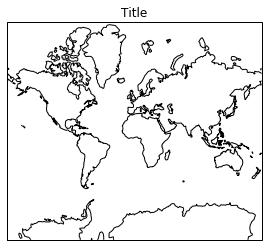

In [2]:
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features
ax = plt.axes(projection = ccrs.Mercator())  # create a set of axes with Mercator projection
ax.add_feature(cf.COASTLINE)                 # plot some data on them
ax.set_title("Title")                        # label it
plt.show()

注意前面提到的projection和features这里都有用到了。现在可以试试别的投影。

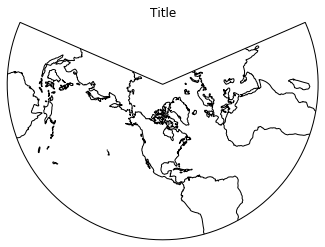

In [3]:
ax = plt.axes(projection = ccrs.LambertConformal())  
ax.add_feature(cf.COASTLINE)                 
ax.set_title("Title")                        
plt.show()

现在看一个局部区域的例子，比较西雅图地区的不同投影：Washington North (EPSG:2926) and Washington South (EPSG:2927)

In [11]:
WASHINGTON_NORTH = 2926
WASHINGTON_SOUTH = 2927
SEATTLE_BOUNDS = [-122.4596959,-122.2244331,47.4919119,47.734145]
WASHINGTON_BOUNDS = [-124.849,-116.9156,45.5435,49.0024]
SEATTLE_CENTER = (-122.3321, 47.6062)
_DEFAULT_PROJECTION = 3857

import cartopy.feature as feature
states_feature = feature.NaturalEarthFeature(category='cultural',
                                             name='admin_1_states_provinces_lakes_shp', 
                                             scale='50m',
                                             facecolor='none', 
                                            edgecolor='black')

先试试第一个投影：

/home/owen/anaconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_lakes_shp.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home/owen/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f2c949113b0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


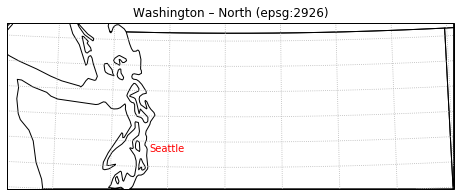

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.epsg(WASHINGTON_NORTH))
#ax.set_extent(<NO EXTENT>) # not setting bounds means we can see the full extent of the projected space.
ax.set_title("Washington – North (epsg:2926)")
ax.add_feature(states_feature)
ax.annotate('Seattle', xy=SEATTLE_CENTER, xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center')
ax.gridlines(linestyle=":")
ax.tissot(lats=range(43, 51), lons=range(-124, -116), alpha=0.4, rad_km=20000, color='orange')
plt.show()

然后是第二个投影：

/home/owen/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f2cca0a5fb0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


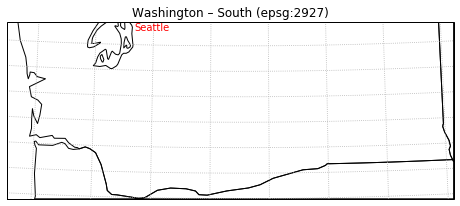

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.epsg(WASHINGTON_SOUTH))
#ax.set_extent(<NO EXTENT>) # not setting bounds means we can see the full extent of the projected space.
ax.set_title("Washington – South (epsg:2927)")
ax.add_feature(states_feature)
ax.annotate('Seattle', xy=SEATTLE_CENTER, xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center')
ax.gridlines(linestyle=":")
ax.tissot(lats=range(43, 51), lons=range(-124, -116), alpha=0.4, rad_km=20000, color='orange')
plt.show()

代码第二行，投影改成了2927，所以最后同样的坐标数值下，不同的坐标系下seattle的位置就显得差别很大了。现在可以再看看 Mercator 投影。

TypeError: Cannot label gridlines on a _EPSGProjection plot.  Only PlateCarree and Mercator plots are currently supported.

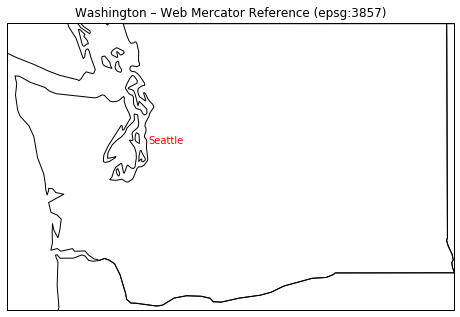

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.epsg(_DEFAULT_PROJECTION))
ax.set_extent(WASHINGTON_BOUNDS) # not setting bounds means we can see the full extent of the projected space.
ax.set_title("Washington – Web Mercator Reference (epsg:3857)")
ax.annotate('Seattle', xy=SEATTLE_CENTER, xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red',
            ha='left', va='center')
ax.add_feature(states_feature)
gl = ax.gridlines(linestyle=":", draw_labels=True)
ax.tissot(lats=range(43, 51), lons=range(-124, -116), alpha=0.4, rad_km=20000, color='orange')

更多关于cartopy中投影的信息可以参考：[Cartopy projection list](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html)。

接下来再详细看看如何绘制地图。

## 绘制地图

cartopy 基于matplotlib，每个投影都知道如何取构建一个matplotlib axes实例来表示自己。投影构建的Axes是cartopy.mpl.geoaxes.GeoAxes的实例。该axes类继承自matplotlib，增加了一些绘制地图时有用的方法。

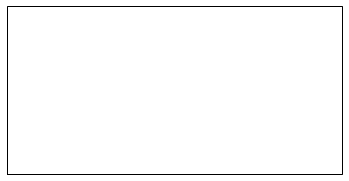

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.axes(projection=ccrs.PlateCarree())

可以看到现在的axes是GeoAxesSubplot的实例。一个常用的feature就是coastlines：

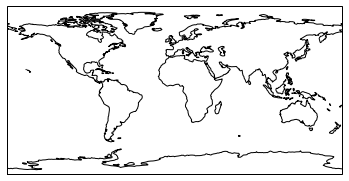

In [15]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt的subplot函数也可以使用：

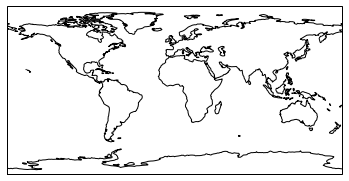

In [16]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

投影还有一些选项可以来定制：

In [17]:
ccrs.PlateCarree?

Init signature: ccrs.PlateCarree(central_longitude=0.0, globe=None)
Docstring:     
The abstract class which denotes cylindrical projections where we
want to allow x values to wrap around.
Init docstring:
Parameters
----------
proj4_params: iterable of key-value pairs
    The proj4 parameters required to define the
    desired CRS.  The parameters should not describe
    the desired elliptic model, instead create an
    appropriate Globe instance. The ``proj4_params``
    parameters will override any parameters that the
    Globe defines.
globe: :class:`~cartopy.crs.Globe` instance, optional
    If omitted, the default Globe instance will be created.
    See :class:`~cartopy.crs.Globe` for details.
File:           ~/anaconda3/lib/python3.7/site-packages/cartopy/crs.py
Type:           ABCMeta
Subclasses:     


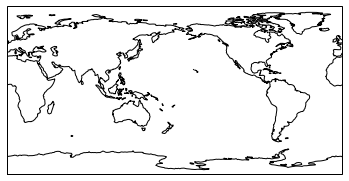

In [18]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()

## GeoAxes的方法

详情可见[cartopy.mpl.geoaxes.GeoAxes](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes)。

这里看看几个常用的方法。

set_extent 方法可以用来帮助创建一个区域性的地图。

In [19]:
ax.set_extent?

Signature: ax.set_extent(extents, crs=None)
Docstring:
Set the extent (x0, x1, y0, y1) of the map in the given
coordinate system.

If no crs is given, the extents' coordinate system will be assumed
to be the Geodetic version of this axes' projection.

Parameters
----------
extent
    Tuple of floats representing the required extent (x0, x1, y0, y1).
File:      ~/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py
Type:      method


/home/owen/anaconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


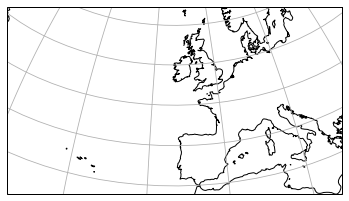

In [20]:
central_lon, central_lat = -10, 45
extent = [-40, 20, 30, 60]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')

上面gridlines 函数是向地图上增加网格线。coastlines 是增加自然的地球海岸线。下面看看使用add_feature 向地图增加features。

/home/owen/anaconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home/owen/anaconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home/owen/anaconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_rivers_lake_centerlines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


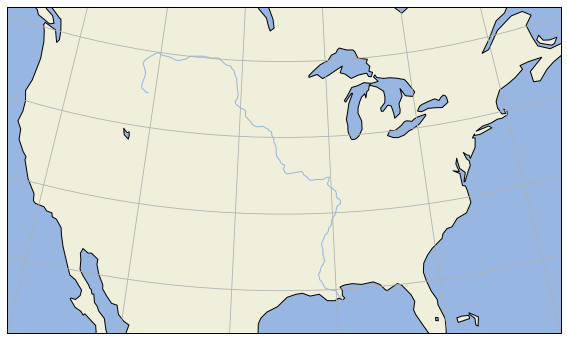

In [23]:
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)
ax.gridlines()

如果需要高分辨率的特征，Cartopy 可以从 Natural Earth Data 数据库和 GSHHS dataset 数据库自动下载并创建。

/home/owen/anaconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_rivers_lake_centerlines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


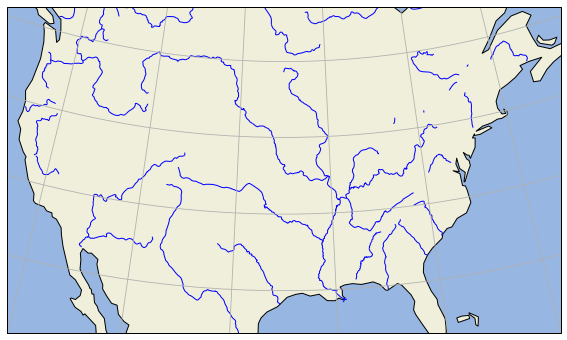

In [24]:
rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')
ax.gridlines()

## 地图上添加数据

在实际科研工程工作中，最关键的还是要将自己的数据展示到地图上。因为地图是一个matplotlib axis，因此我们可以使用所有熟悉的matplotlib 命令来作图。默认的地图的范围会自动调整到能匹配数据的！

In [25]:
# create some test data
new_york = dict(lon=-74.0060, lat=40.7128)
honolulu = dict(lon=-157.8583, lat=21.3069)
lons = [new_york['lon'], honolulu['lon']]
lats = [new_york['lat'], honolulu['lat']]

注意，数据要转换到匹配的投影空间上。这可以通过绘制方法中的transform参数来实现，参数数值是cartopy.crs的值。如果不指定transform，那么默认使用和geoaxis对象的投影一样的。

官方文档关于投影的说法：

“The core concept is that the projection of your axes is independent of the coordinate system your data is defined in. The projection argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The transform argument to plotting functions tells Cartopy what coordinate system your data are defined in.”

也就是说，transform参数定义的是数据本身的投影类型。

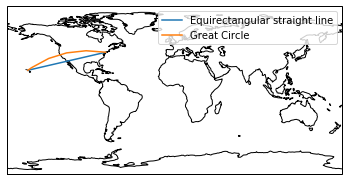

In [26]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line')
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic())
ax.coastlines()
ax.legend()
ax.set_global()

 栅格数据绘制也很方便。下面是一个栅格数据的原图

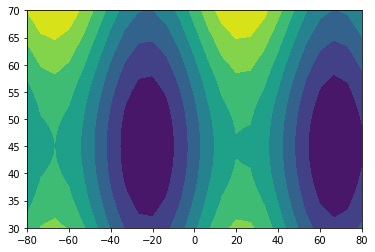

In [27]:
import numpy as np
lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
plt.contourf(lon2d, lat2d, data)

现在把它添加到地图上

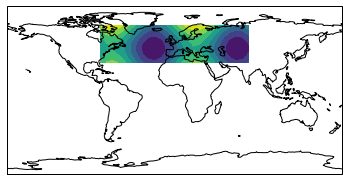

In [28]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

注意坐标，如果我们使用的是别的投影，又不指定，那么会变得奇怪

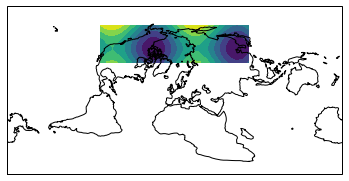

In [29]:
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

这时候需要在contourf函数中指定transform参数

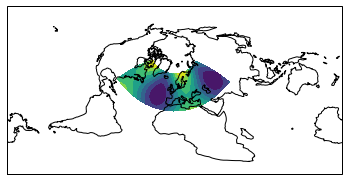

In [30]:
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

还可以在图中展示图片。

In [31]:
! wget https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg

--2020-02-05 17:15:08--  https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg
正在解析主机 lance-modis.eosdis.nasa.gov (lance-modis.eosdis.nasa.gov)... 198.118.194.28, 2001:4d0:241a:40c0::28
正在连接 lance-modis.eosdis.nasa.gov (lance-modis.eosdis.nasa.gov)|198.118.194.28|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 256220 (250K) [image/jpeg]
正在保存至: “Miriam.A2012270.2050.2km.jpg”

Miriam.A2012270.205 100%[===================>] 250.21K  --.-KB/s    用时 0.1s    

2020-02-05 17:15:09 (2.05 MB/s) - 已保存 “Miriam.A2012270.2050.2km.jpg” [256220/256220])



Text(-117, 33, 'San Diego')

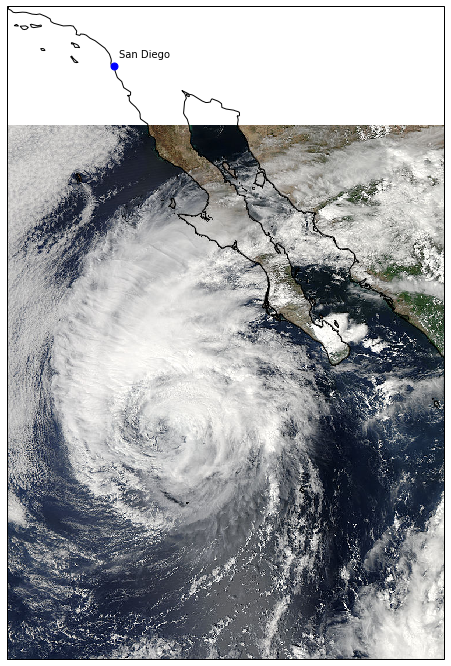

In [32]:
fig = plt.figure(figsize=(8, 12))

# this is from the cartopy docs
fname = 'Miriam.A2012270.2050.2km.jpg'
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

geopandas和cartopy可以很好的联合使用。直接看实例，先获取geopandas数据。

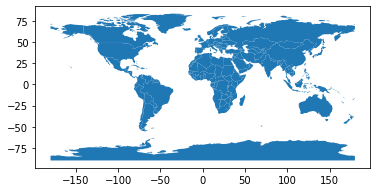

In [37]:
# sphinx_gallery_thumbnail_number = 7
import matplotlib.pyplot as plt
import geopandas
from cartopy import crs as ccrs

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']
df.plot()

Cartopy 使用的CRS系统和Shapely（geopandas中处理坐标系用到的库）有些不同，因此使用Cartopy绘图的第一步是需要把数据投影到新的坐标系。完成这一步，首先要定义一个CartoPy的CRS，然后使用Geopandas的to_crs函数将geopandas数据的坐标转换到Cartopy的坐标系下即可。

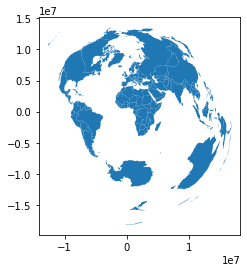

In [38]:
# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = df.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot()

现在数据就在CartoPy的坐标系下了，那么就可以绘图了。

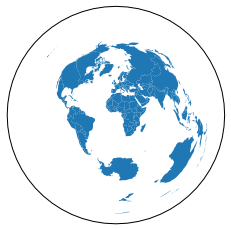

In [39]:
fig, ax = plt.subplots(subplot_kw={'projection': crs})
ax.add_geometries(df_ae['geometry'], crs=crs)

另外，可以使用EPSG码简单使用坐标系。

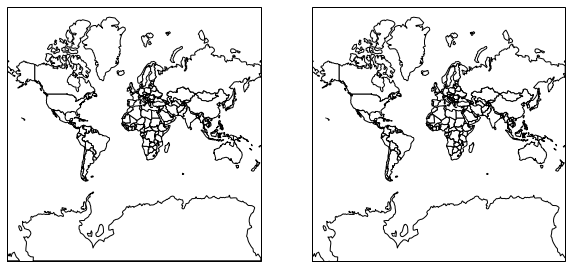

In [40]:
crs_epsg = ccrs.epsg('3857')
df_epsg = df.to_crs(epsg='3857')

# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': crs_epsg},
                        figsize=(10, 5))
# Make the CartoPy plot
axs[0].add_geometries(df_epsg['geometry'], crs=crs_epsg,
                      facecolor='white', edgecolor='black')
# Make the GeoPandas plot
df_epsg.plot(ax=axs[1], color='white', edgecolor='black')

既然能从geopandas转到cartopy，也可以反过来转。先看一个cartopy：

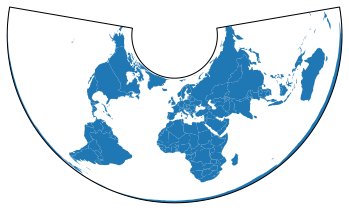

In [41]:
crs_new = ccrs.AlbersEqualArea()
new_geometries = [crs_new.project_geometry(ii, src_crs=crs)
                  for ii in df_ae['geometry'].values]

fig, ax = plt.subplots(subplot_kw={'projection': crs_new})
ax.add_geometries(new_geometries, crs=crs_new)

然后将数据转到geopandas的坐标系下：

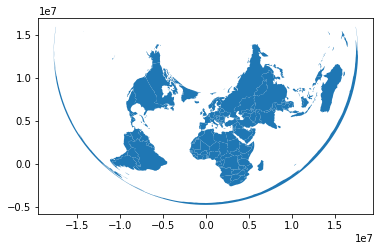

In [42]:
df_aea = geopandas.GeoDataFrame(df['gdp_pp'], geometry=new_geometries,
                                crs=crs_new.proj4_init)
df_aea.plot()

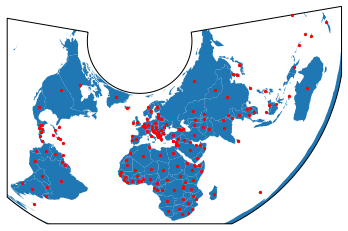

In [43]:
# Generate a CartoPy figure and add the countries to it
fig, ax = plt.subplots(subplot_kw={'projection': crs_new})
ax.add_geometries(new_geometries, crs=crs_new)

# Calculate centroids and plot
df_aea_centroids = df_aea.geometry.centroid
# Need to provide "zorder" to ensure the points are plotted above the polygons
df_aea_centroids.plot(ax=ax, markersize=5, color='r', zorder=10)

plt.show()

此外，在地球科学中，[xarray](http://xarray.pydata.org/en/stable/#)是经常会用到的数据结构，而cartopy 可以和它很好的联合使用，比如读取netCDF数据并展示。以后用到了再详细补充。